In [1]:
import pandas as pd
import numpy as np

from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder
import sys
sys.path.append("/home/leon/projects/gaussian_process/")
from sklearn.model_selection import cross_val_score
from gecs100.gec import GEC
from gecs100.utils.gaussian_process_visualisation import visualise_1D_gaussian_process, visualise_2D_gaussian_process

gec = GEC()
gec.load_gp_datas("./gp_datas.json")


In [2]:
path = "/home/leon/learning/gaussian-processes/bank/bank-full.csv"
data = pd.read_csv(path, sep=";")
one_hot_encode = ["job", "marital", "education", "contact", "poutcome", "month"]
binary = ["default", "housing", "loan", "y"]

enc = OneHotEncoder()
def yesNoBinary(column):
    return(pd.DataFrame([1 if value == "yes" else 0 for value in column], columns = [column.name]))
one_hot = pd.DataFrame(enc.fit_transform(data[one_hot_encode]).toarray(), columns=enc.get_feature_names_out(one_hot_encode))
data2 = pd.concat([one_hot] + [ yesNoBinary(data[col]) if col in binary else data[col] for col in data.columns ], 1).drop(one_hot_encode, 1)
X, y = data2.values[:,:-1], data2.values[:,-1]
ind = np.random.uniform(0, 1, X.shape[0]) > 0.3
X = X[ind,:]
y = y[ind]

X_pos = X[y==1,:]
y_pos = y[y==1]

X_reweighted = np.concatenate([X] + [X_pos]*3, axis=0)
y_reweighted = np.concatenate([y] + [y_pos]*3)

/tmp/ipykernel_121206/3574338328.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data2 = pd.concat([one_hot] + [ yesNoBinary(data[col]) if col in binary else data[col] for col in data.columns ], 1).drop(one_hot_encode, 1)
/tmp/ipykernel_121206/3574338328.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2 = pd.concat([one_hot] + [ yesNoBinary(data[col]) if col in binary else data[col] for col in data.columns ], 1).drop(one_hot_encode, 1)


In [3]:
gec.fit(X_reweighted, y_reweighted, 0)

0it [00:00, ?it/s]


3
524880
1
1889568
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9399999999999996, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9399999999999996
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


GEC(bagging_fraction=0.1, bagging_freq=9, boosting='gbdt',
    feature_fraction=0.9399999999999996, lambda_l1=0.0,
    learning_rate=0.31622776601683794, max_bin=20, min_data_in_leaf=2,
    n_estimators=350, num_leaves=180)

In [4]:
len(gec.gp_datas["dart"]["inputs"])

19

/home/leon/miniconda3/envs/dev/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


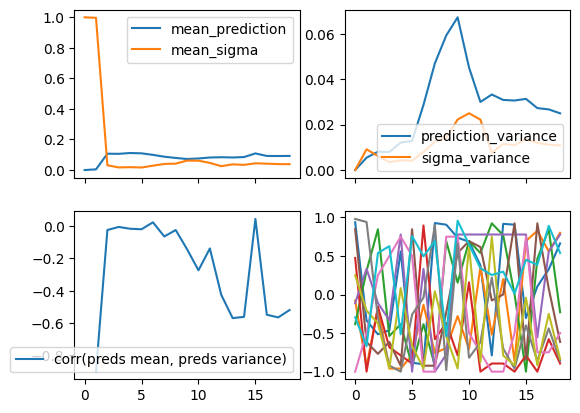

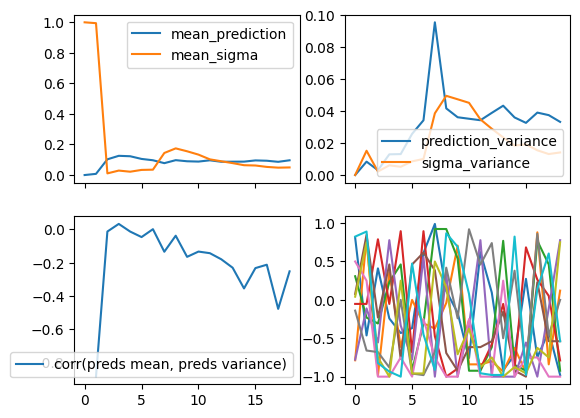

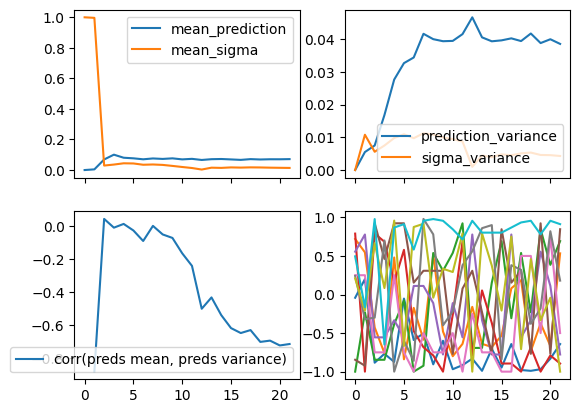

In [5]:
gec.save_figs("./test")

In [6]:
print(gec.best_params_)
knn_bayes = LGBMClassifier(**gec.best_params_)
score_bayes = np.mean(cross_val_score(knn_bayes, X, y, cv=5))
score_bayes

None


TypeError: lightgbm.sklearn.LGBMClassifier() argument after ** must be a mapping, not NoneType

In [7]:
print(gec.best_params_grid)
knn_bayes = LGBMClassifier(**gec.best_params_grid)
score_bayes = np.mean(cross_val_score(knn_bayes, X, y, cv=5))
score_bayes

{'boosting': 'gbdt', 'num_leaves': 180, 'learning_rate': 0.31622776601683794, 'n_estimators': 350, 'bagging_fraction': 0.1, 'bagging_freq': 9, 'max_bin': 20, 'max_depth': -1, 'lambda_l1': 0.0, 'min_data_in_leaf': 2, 'feature_fraction': 0.9399999999999996}
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9399999999999996, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9399999999999996
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l1 is 

0.8549283150069055

In [ ]:
gec.export_gp_datas("./gp_datas.json")

In [ ]:

import matplotlib.pyplot as plt
x = np.arange(len(gec.gp_datas["gbdt"]["means"]))
gp_mean_prediction = [np.mean(x) for x in gec.gp_datas["gbdt"]["means"]]
gp_mean_sigma = [np.mean(x) for x in gec.gp_datas["gbdt"]["sigmas"]]

plt.plot(x, gp_mean_prediction, label="mean_prediction")
plt.plot(x, gp_mean_sigma, label="mean_sigma")
plt.legend(loc="upper right")

In [ ]:

import matplotlib.pyplot as plt
x = np.arange(len(gec.gp_datas["gbdt"]["means"]))
gp_prediction_variance = [np.std(x) for x in gec.gp_datas["gbdt"]["means"]]
gp_sigma_variance = [np.std(x) for x in gec.gp_datas["gbdt"]["sigmas"]]

plt.plot(x, gp_prediction_variance, label="prediction_variance")
plt.plot(x, gp_sigma_variance, label="sigma_variance")
plt.legend(loc="lower right")

In [ ]:

import matplotlib.pyplot as plt
x = np.arange(len(gec.gp_datas["gbdt"]["means"]))
correlation = [np.corrcoef(gec.gp_datas["gbdt"]["means"][i], gec.gp_datas["gbdt"]["sigmas"][i])[0,1] for i in x]

plt.plot(x, correlation, label="correlation between prediction mean and prediction variance")
plt.legend(loc="lower right")



In [ ]:
np.array([np.mean(gec.gp_datas["gbdt"]["output"][i:i+10]) for i in range(1040)])

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
inputs_ = np.array(gec.gp_datas["gbdt"]["inputs"])
x = np.arange(inputs_.shape[0])
for i in range(inputs_.shape[1]):
    plt.plot(x, inputs_[:,i], label ='y1')


In [ ]:
np.mean(gec.predict(X))

In [ ]:
print(gec.best_params_)
knn_bayes = LGBMClassifier(**gec.best_params_)
score_bayes = np.mean(cross_val_score(knn_bayes, X, y, cv=5))
score_bayes

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
classifier = LGBMClassifier()
hyperparams = dict(gec.categorical_hyperparameters + gec.real_hyperparameters)
gs = RandomizedSearchCV(classifier, hyperparams, n_iter=50)
gs.fit(X_reweighted, y_reweighted)

In [ ]:
X_eval, y_eval = X_reweighted, y_reweighted
knn_bayes = LGBMClassifier(**gec.best_params_)
score_bayes = np.mean(cross_val_score(knn_bayes, X_eval, y_eval, cv=5))

knn_gs = LGBMClassifier(**gs.best_params_)
score_gs = np.mean(cross_val_score(knn_gs, X_eval, y_eval, cv=5))
knn_default = LGBMClassifier()
score_default = np.mean(cross_val_score(knn_default, X_eval, y_eval, cv=5))
print(f"bayesian: {score_bayes}, random search: {score_gs}, default: {score_default}")


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.utils.extmath import cartesian
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

gaussian = GaussianProcessRegressor(kernel=gec.kernel)
#gaussian.fit(result['uniform'][0], result['uniform'][0].dot(np.array([1.0, 3.0]))/500)
gaussian.fit(gec.gp_datas['gbdt'][0], gec.gp_datas['gbdt'][1])

In [ ]:
visualise_2D_gaussian_process(gaussian, (np.logspace(0.00, 1, 50) -1)/9, np.arange(10, 200, 1), np.arange(0.5, 1, 0.1))

In [ ]:
print(gec.best_params_)
knn_bayes = LGBMClassifier(**gec.best_params_)
score_bayes = np.mean(cross_val_score(knn_bayes, X, y, cv=5))
score_bayes

In [ ]:
knn_bayes = LGBMClassifier(**{'boosting': 'gbdt', 'lambda_l1': 0.46, 'num_leaves': 12})
score_bayes = np.mean(cross_val_score(knn_bayes, X, y, cv=5))
score_bayes